In [5]:
!pip install ipywidgets
import ipywidgets as widgets
import json
import io

# Create an upload button
upload_button = widgets.FileUpload(
    accept='kaggle.json',  # Accept JSON files only
    multiple=False  # Allow single file upload
)

# Function to handle the uploaded file
def handle_upload(change):
    for filename, file_info in upload_button.value.items():
        content = io.BytesIO(file_info['content'])
        data = json.load(content)  # Load the JSON file
        print(data)  # Print the content of the JSON file

# Attach the upload button to the handler
upload_button.observe(handle_upload, names='value')

# Display the upload button
display(upload_button)

FileUpload(value=(), accept='kaggle.json', description='Upload')

In [6]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d tolgadincer/labeled-chest-xray-images
!unzip labeled-chest-xray-images.zip

Dataset URL: https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images
License(s): other
100%|█████████████████████████████████████▉| 1.17G/1.17G [02:24<00:00, 8.85MB/s]
100%|██████████████████████████████████████| 1.17G/1.17G [02:24<00:00, 8.68MB/s]
Archive:  labeled-chest-xray-images.zip
  inflating: chest_xray/test/NORMAL/NORMAL-1049278-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL-1110860-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL-11419-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL-115218-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL-1160949-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL-1212407-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL-1228182-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL-1283091-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL-1318320-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL-1368583-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL-1430636-0001.jpeg  
  infla

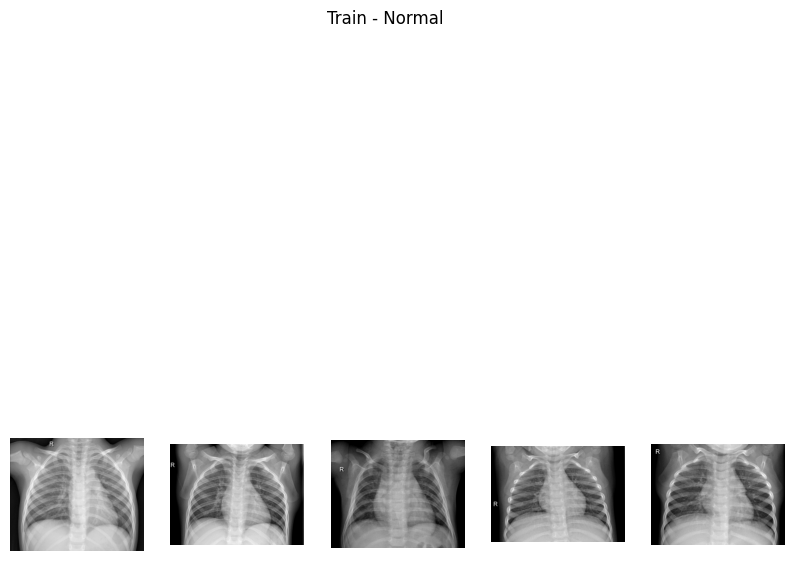

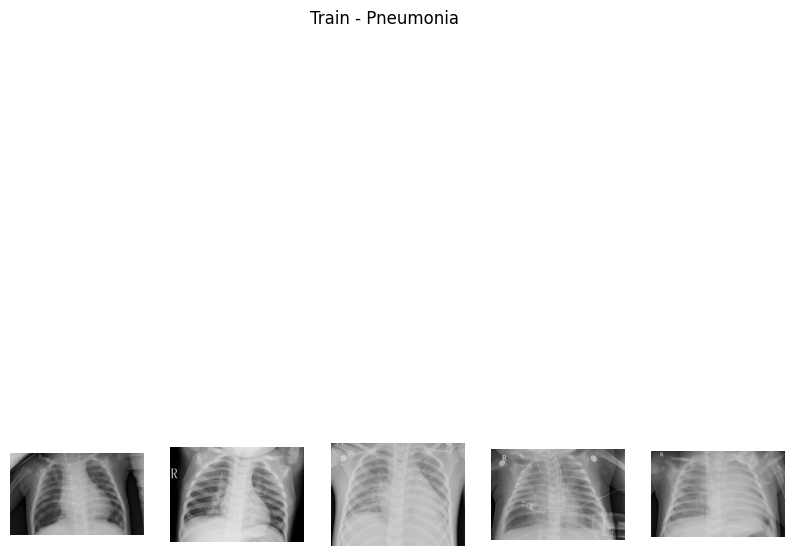

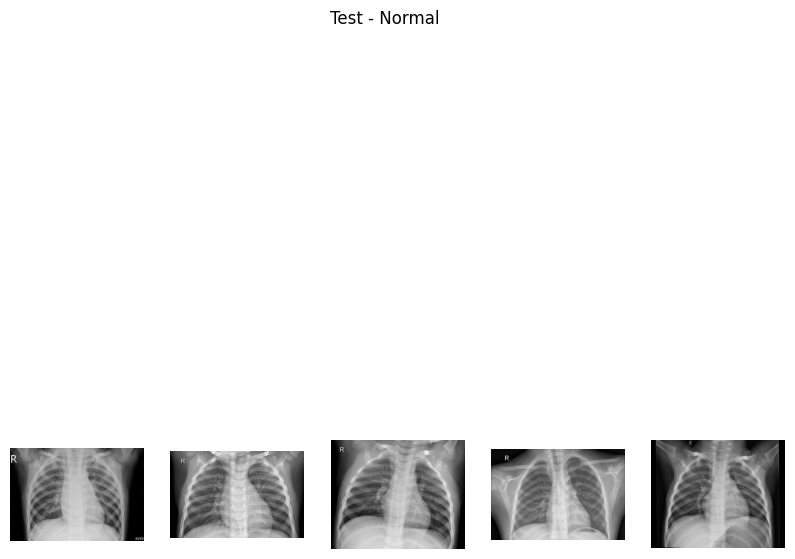

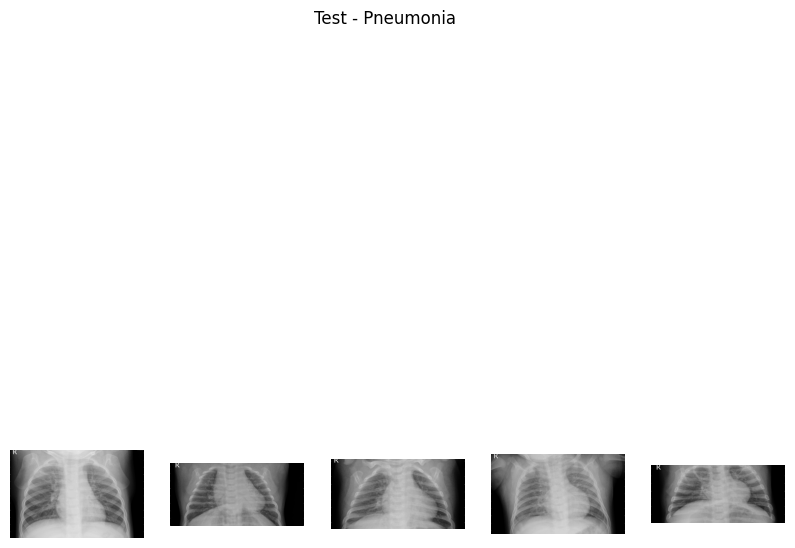

Train Normal Images: 1349
Train Pneumonia Images: 3883
Test Normal Images: 234
Test Pneumonia Images: 390


In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Paths
train_normal_path = 'chest_xray/train/NORMAL'
train_pneumonia_path = 'chest_xray/train/PNEUMONIA'
test_normal_path = 'chest_xray/test/NORMAL'
test_pneumonia_path = 'chest_xray/test/PNEUMONIA'

# Function to load images from a directory
def load_images_from_folder(folder, count=5):
    images = []
    for filename in os.listdir(folder)[:count]:
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Load some sample images
train_normal_images = load_images_from_folder(train_normal_path)
train_pneumonia_images = load_images_from_folder(train_pneumonia_path)
test_normal_images = load_images_from_folder(test_normal_path)
test_pneumonia_images = load_images_from_folder(test_pneumonia_path)

# Function to display images
def display_images(images, title):
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display sample images
display_images(train_normal_images, "Train - Normal")
display_images(train_pneumonia_images, "Train - Pneumonia")
display_images(test_normal_images, "Test - Normal")
display_images(test_pneumonia_images, "Test - Pneumonia")

# Data distribution
train_normal_count = len(os.listdir(train_normal_path))
train_pneumonia_count = len(os.listdir(train_pneumonia_path))
test_normal_count = len(os.listdir(test_normal_path))
test_pneumonia_count = len(os.listdir(test_pneumonia_path))

print(f"Train Normal Images: {train_normal_count}")
print(f"Train Pneumonia Images: {train_pneumonia_count}")
print(f"Test Normal Images: {test_normal_count}")
print(f"Test Pneumonia Images: {test_pneumonia_count}")


2024-06-25 06:48:01.809528: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


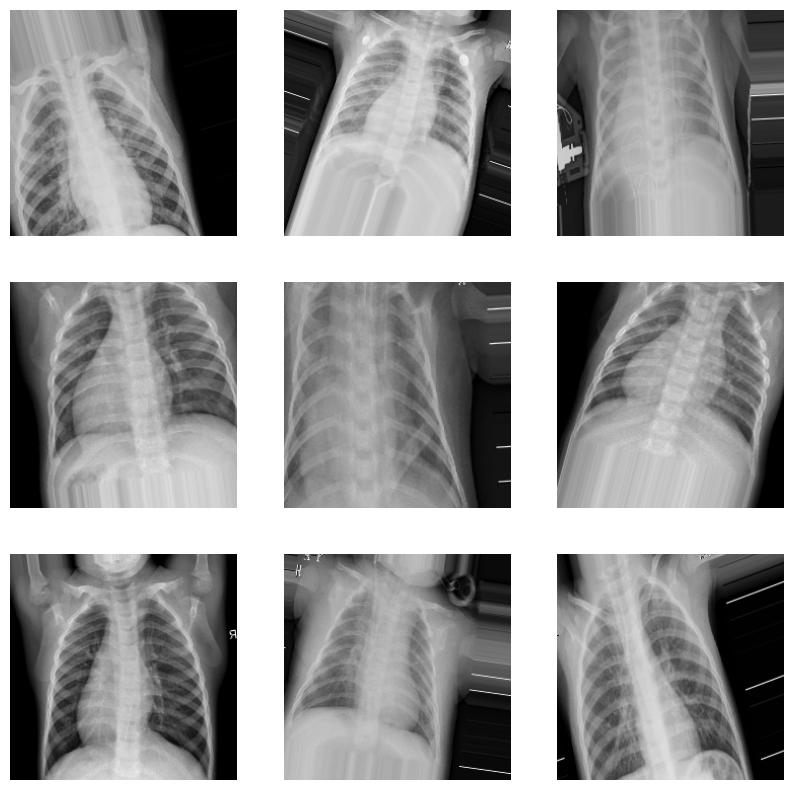

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the image size and batch size
IMG_SIZE = (224, 224)  # Resize images to 224x224
BATCH_SIZE = 32

# Define the data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear angle in counter-clockwise direction
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels with the nearest pixel
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test/validation

# Load the train and test datasets
train_generator = train_datagen.flow_from_directory(
    'chest_xray/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Use 'binary' for 2 classes or 'categorical' for >2 classes
)

test_generator = test_datagen.flow_from_directory(
    'chest_xray/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Visualize some augmented images
def visualize_augmented_images(generator):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()

visualize_augmented_images(train_generator)


2024-06-25 06:54:14.220449: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 06:54:14.452302: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1637] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 32646 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:90:00.0, compute capability: 8.0


58889256/58889256 [==============================] - 8s 0us/step
Epoch 1/10


2024-06-25 06:54:25.678872: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700


  1/163 [..............................] - ETA: 4:29 - loss: 0.6785 - accuracy: 0.7500

2024-06-25 06:54:26.138572: I tensorflow/stream_executor/cuda/cuda_blas.cc:1633] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


163/163 [==============================] - 79s 477ms/step - loss: 0.3096 - accuracy: 0.8619 - val_loss: 0.2833 - val_accuracy: 0.8964
Epoch 2/10
163/163 [==============================] - 79s 484ms/step - loss: 0.2243 - accuracy: 0.9110 - val_loss: 0.2506 - val_accuracy: 0.8980
Epoch 3/10
163/163 [==============================] - 79s 481ms/step - loss: 0.1909 - accuracy: 0.9231 - val_loss: 0.2372 - val_accuracy: 0.9095
Epoch 4/10
163/163 [==============================] - 78s 476ms/step - loss: 0.1680 - accuracy: 0.9337 - val_loss: 0.2072 - val_accuracy: 0.9145
Epoch 5/10
163/163 [==============================] - 78s 478ms/step - loss: 0.1572 - accuracy: 0.9367 - val_loss: 0.2428 - val_accuracy: 0.9079
Epoch 6/10
163/163 [==============================] - 78s 478ms/step - loss: 0.1696 - accuracy: 0.9304 - val_loss: 0.2844 - val_accuracy: 0.8832
Epoch 7/10
163/163 [==============================] - 79s 483ms/step - loss: 0.1528 - accuracy: 0.9362 - val_loss: 0.2056 - val_accuracy: 0.9

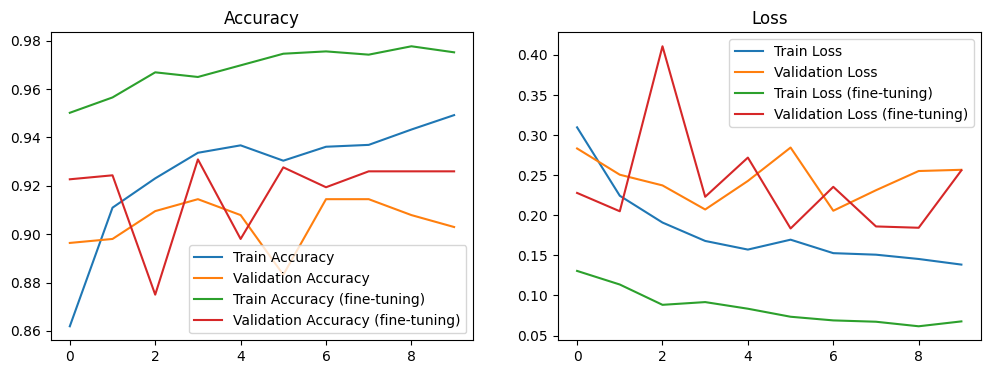

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model, pre-trained on ImageNet, without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new top layers for our specific classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the convolutional base layers (fine-tuning only the top layers)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=10
)

# Unfreeze some layers in the convolutional base and continue training (fine-tuning)
for layer in base_model.layers[:15]:
    layer.trainable = False
for layer in base_model.layers[15:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=10
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Train Accuracy (fine-tuning)')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy (fine-tuning)')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Train Loss (fine-tuning)')
plt.plot(history_fine.history['val_loss'], label='Validation Loss (fine-tuning)')
plt.legend()
plt.title('Loss')

plt.show()


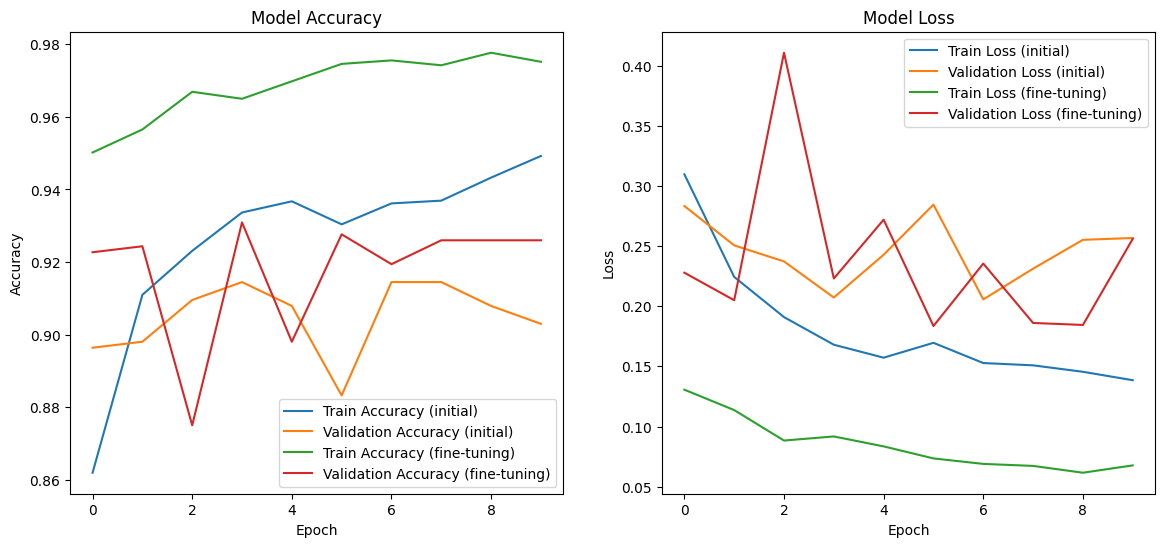

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy (initial)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (initial)')
plt.plot(history_fine.history['accuracy'], label='Train Accuracy (fine-tuning)')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy (fine-tuning)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss (initial)')
plt.plot(history.history['val_loss'], label='Validation Loss (initial)')
plt.plot(history_fine.history['loss'], label='Train Loss (fine-tuning)')
plt.plot(history_fine.history['val_loss'], label='Validation Loss (fine-tuning)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()


In [12]:
from tensorflow.keras.layers import Dropout

# Enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Model with Dropout layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the convolutional base layers (fine-tuning only the top layers)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=10
)

# Unfreeze some layers in the convolutional base and continue training (fine-tuning)
for layer in base_model.layers[:15]:
    layer.trainable = False
for layer in base_model.layers[15:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=10
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Train Accuracy (fine-tuning)')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy (fine-tuning)')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Train Loss (fine-tuning)')
plt.plot(history_fine.history['val_loss'], label='Validation Loss (fine-tuning)')
plt.legend()
plt.title('Loss')

plt.show()


NameError: name 'train_dir' is not defined

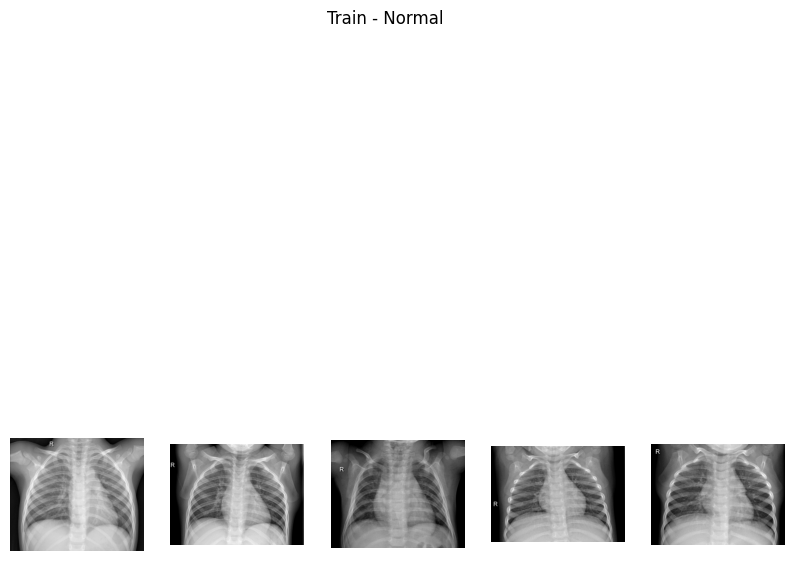

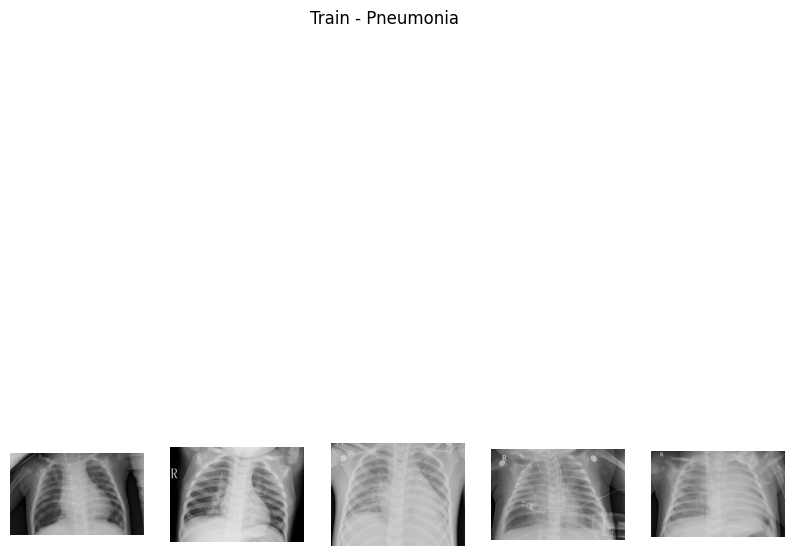

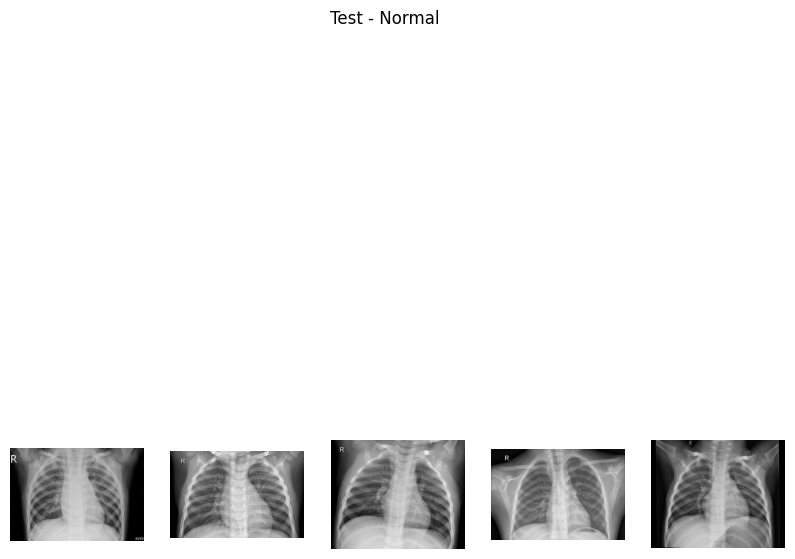

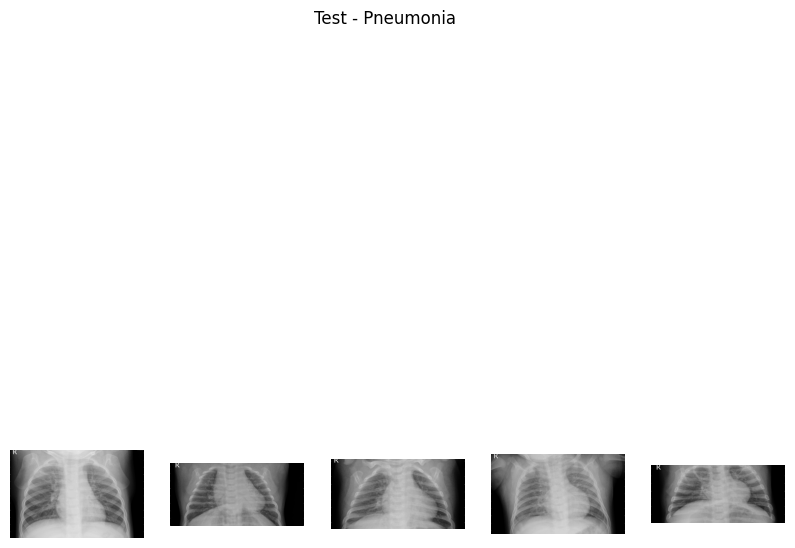

Train Normal Images: 1349
Train Pneumonia Images: 3883
Test Normal Images: 234
Test Pneumonia Images: 390
Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


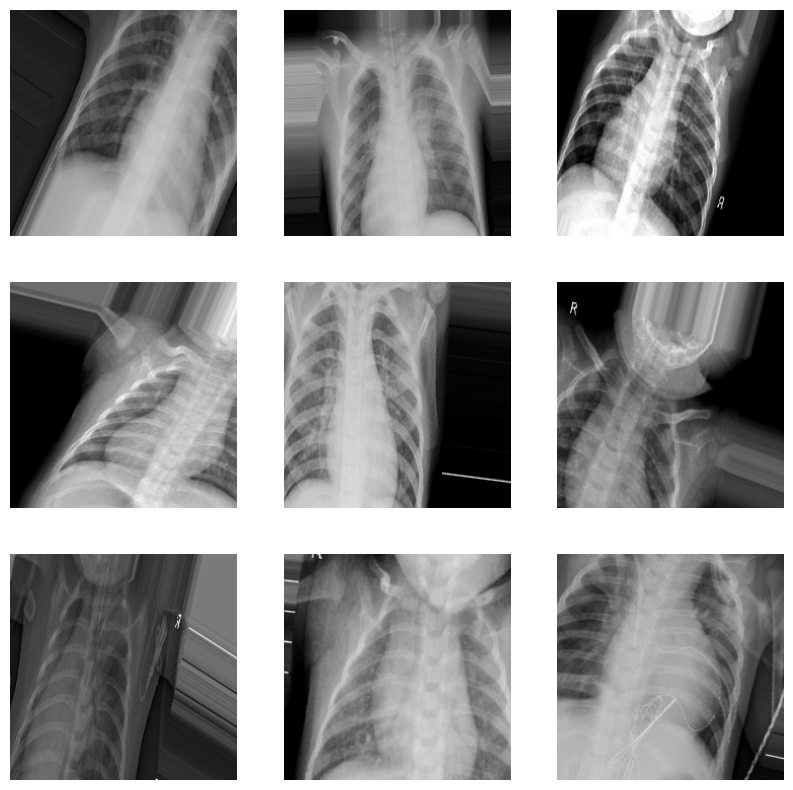

94765736/94765736 [==============================] - 7s 0us/step
Epoch 1/10
163/163 [==============================] - 84s 498ms/step - loss: 0.5935 - accuracy: 0.7204 - val_loss: 0.5789 - val_accuracy: 0.6431 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 77s 474ms/step - loss: 0.5121 - accuracy: 0.7540 - val_loss: 0.5576 - val_accuracy: 0.6612 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - 77s 475ms/step - loss: 0.4838 - accuracy: 0.7571 - val_loss: 0.6000 - val_accuracy: 0.6349 - lr: 0.0010
Epoch 4/10
163/163 [==============================] - 80s 491ms/step - loss: 0.4639 - accuracy: 0.7719 - val_loss: 0.5197 - val_accuracy: 0.7780 - lr: 0.0010
Epoch 5/10
163/163 [==============================] - 78s 481ms/step - loss: 0.4623 - accuracy: 0.7713 - val_loss: 0.6291 - val_accuracy: 0.6497 - lr: 0.0010
Epoch 6/10
163/163 [==============================] - 79s 486ms/step - loss: 0.4494 - accuracy: 0.7762 - val_loss: 0.5199 - val_accuracy: 0.8043 

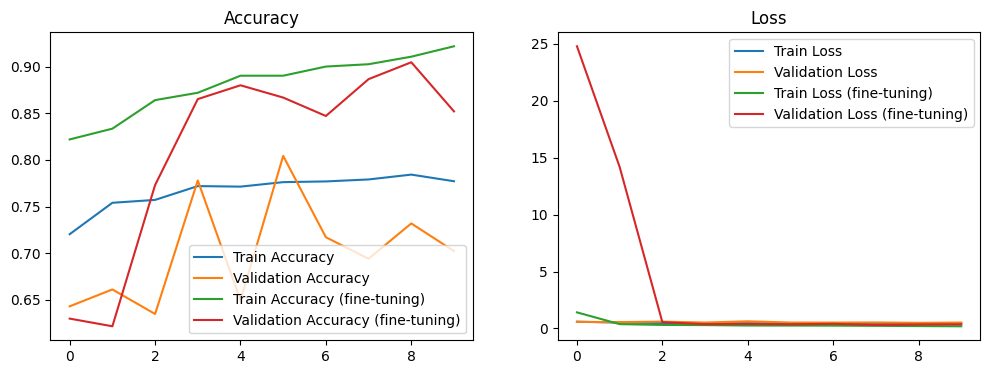

In [13]:


                                     #the usage of Res 50 to increase the accuracy  to   

import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Paths
train_normal_path = 'chest_xray/train/NORMAL'
train_pneumonia_path = 'chest_xray/train/PNEUMONIA'
test_normal_path = 'chest_xray/test/NORMAL'
test_pneumonia_path = 'chest_xray/test/PNEUMONIA'

# Function to load images from a directory
def load_images_from_folder(folder, count=5):
    images = []
    for filename in os.listdir(folder)[:count]:
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Load some sample images
train_normal_images = load_images_from_folder(train_normal_path)
train_pneumonia_images = load_images_from_folder(train_pneumonia_path)
test_normal_images = load_images_from_folder(test_normal_path)
test_pneumonia_images = load_images_from_folder(test_pneumonia_path)

# Function to display images
def display_images(images, title):
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display sample images
display_images(train_normal_images, "Train - Normal")
display_images(train_pneumonia_images, "Train - Pneumonia")
display_images(test_normal_images, "Test - Normal")
display_images(test_pneumonia_images, "Test - Pneumonia")

# Data distribution
train_normal_count = len(os.listdir(train_normal_path))
train_pneumonia_count = len(os.listdir(train_pneumonia_path))
test_normal_count = len(os.listdir(test_normal_path))
test_pneumonia_count = len(os.listdir(test_pneumonia_path))

print(f"Train Normal Images: {train_normal_count}")
print(f"Train Pneumonia Images: {train_pneumonia_count}")
print(f"Test Normal Images: {test_normal_count}")
print(f"Test Pneumonia Images: {test_pneumonia_count}")

# Set the image size and batch size
IMG_SIZE = (224, 224)  # Resize images to 224x224
BATCH_SIZE = 32

# Define the data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.3,  # Increased width shift range
    height_shift_range=0.3,  # Increased height shift range
    shear_range=0.3,  # Increased shear range
    zoom_range=0.3,  # Increased zoom range
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels with the nearest pixel
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test/validation

# Load the train and test datasets
train_generator = train_datagen.flow_from_directory(
    'chest_xray/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Use 'binary' for 2 classes or 'categorical' for >2 classes
)

test_generator = test_datagen.flow_from_directory(
    'chest_xray/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Visualize some augmented images
def visualize_augmented_images(generator):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()

visualize_augmented_images(train_generator)

# Load the ResNet50 model, pre-trained on ImageNet, without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new top layers for our specific classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the convolutional base layers (fine-tuning only the top layers)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=10,
    callbacks=[reduce_lr, early_stopping]
)

# Unfreeze some layers in the convolutional base and continue training (fine-tuning)
for layer in base_model.layers[:50]:  # Unfreeze more layers
    layer.trainable = False
for layer in base_model.layers[50:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=10,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Train Accuracy (fine-tuning)')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy (fine-tuning)')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Train Loss (fine-tuning)')
plt.plot(history_fine.history['val_loss'], label='Validation Loss (fine-tuning)')
plt.legend()
plt.title('Loss')

plt.show()


Epoch 1/10
163/163 [==============================] - 82s 492ms/step - loss: 0.5458 - accuracy: 0.7369 - val_loss: 0.5373 - val_accuracy: 0.6891 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 82s 500ms/step - loss: 0.4699 - accuracy: 0.7727 - val_loss: 0.5015 - val_accuracy: 0.7303 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - 80s 490ms/step - loss: 0.4247 - accuracy: 0.7892 - val_loss: 0.4958 - val_accuracy: 0.7434 - lr: 0.0010
Epoch 4/10
163/163 [==============================] - 79s 482ms/step - loss: 0.4158 - accuracy: 0.7954 - val_loss: 0.4969 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 5/10
163/163 [==============================] - 82s 502ms/step - loss: 0.4264 - accuracy: 0.7912 - val_loss: 0.5082 - val_accuracy: 0.8059 - lr: 0.0010
Epoch 6/10
163/163 [==============================] - ETA: 0s - loss: 0.4064 - accuracy: 0.8054
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
163/163 [============================

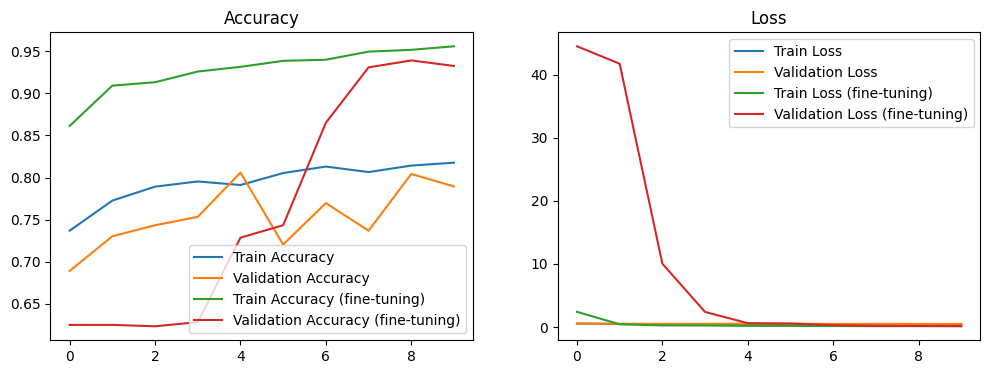

In [14]:


                              #Res50 using previous weights of VGG-16



import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


# Load the ResNet50 model, pre-trained on ImageNet, without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



# Add new top layers for our specific classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Freeze the convolutional base layers (fine-tuning only the top layers)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=10,
    callbacks=[reduce_lr, early_stopping]
)
  




# Unfreeze some layers in the convolutional base and continue training (fine-tuning)
for layer in base_model.layers[:15]:
    layer.trainable = False
for layer in base_model.layers[15:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=10
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Train Accuracy (fine-tuning)')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy (fine-tuning)')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Train Loss (fine-tuning)')
plt.plot(history_fine.history['val_loss'], label='Validation Loss (fine-tuning)')
plt.legend()
plt.title('Loss')

plt.show()


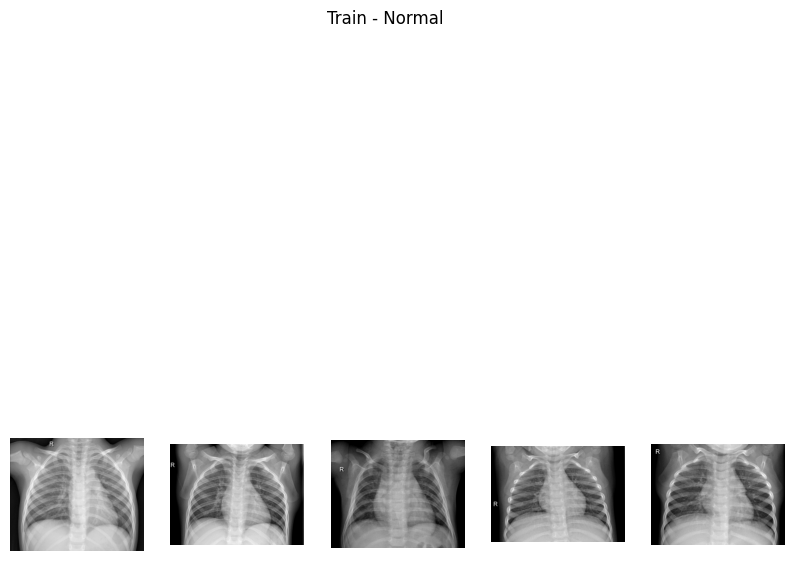

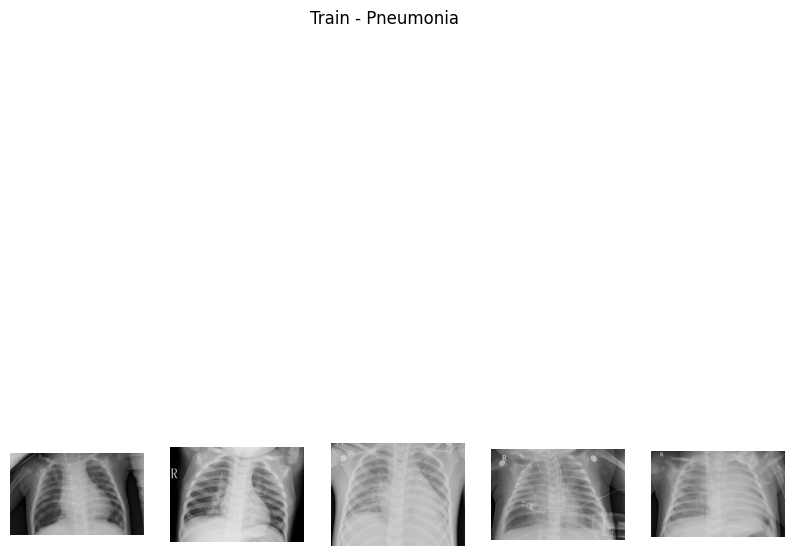

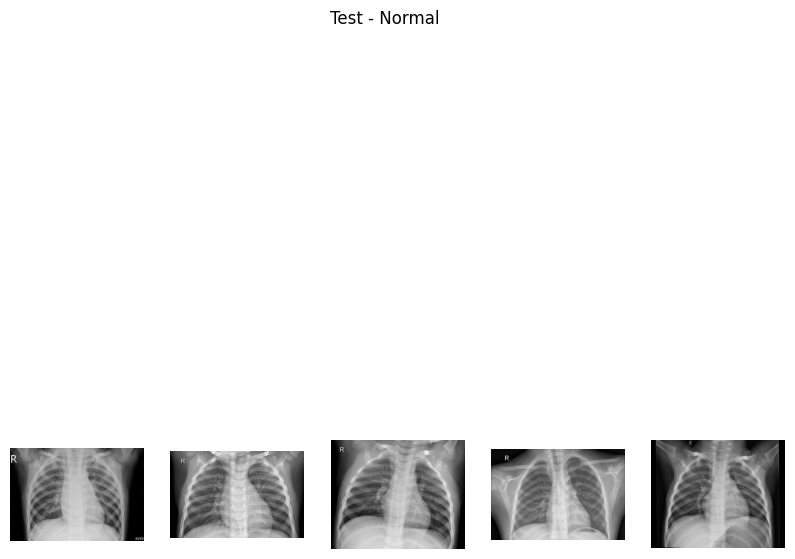

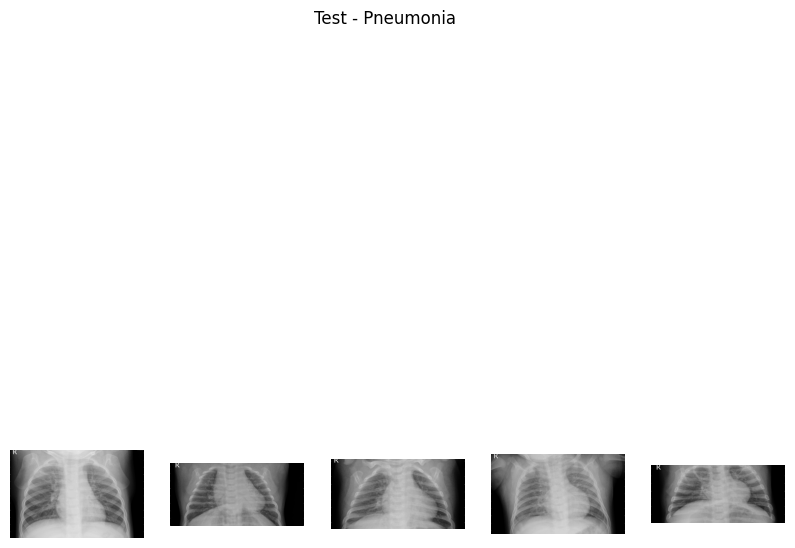

Train Normal Images: 1349
Train Pneumonia Images: 3883
Test Normal Images: 234
Test Pneumonia Images: 390
Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


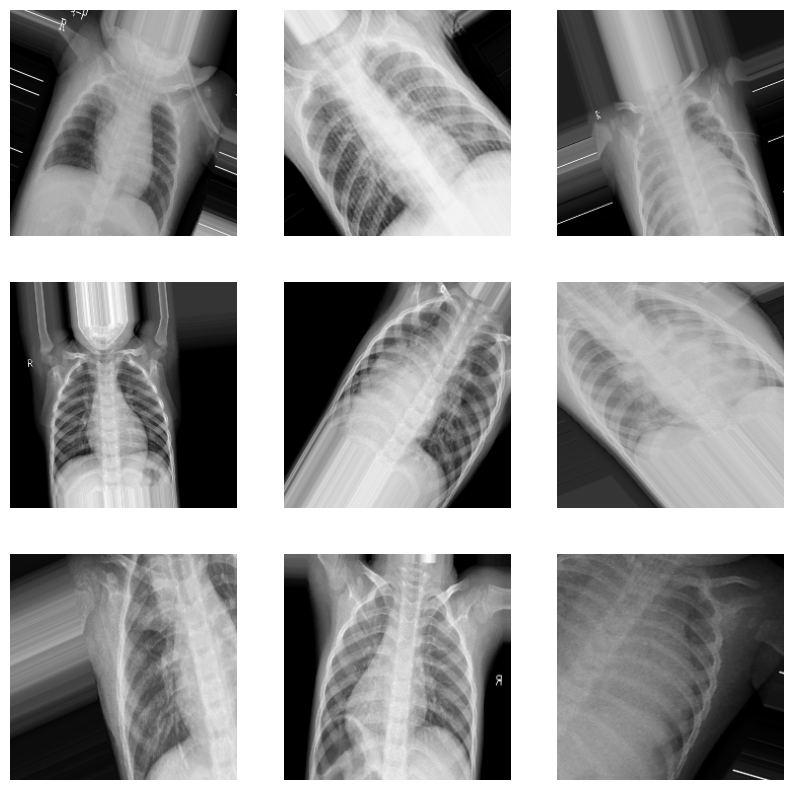

Epoch 1/20
163/163 [==============================] - 86s 501ms/step - loss: 0.5970 - accuracy: 0.7352 - val_loss: 0.7349 - val_accuracy: 0.6217 - lr: 0.0010
Epoch 2/20
163/163 [==============================] - 81s 499ms/step - loss: 0.5809 - accuracy: 0.7418 - val_loss: 0.6756 - val_accuracy: 0.6234 - lr: 0.0010
Epoch 3/20
163/163 [==============================] - 80s 488ms/step - loss: 0.5791 - accuracy: 0.7425 - val_loss: 0.6989 - val_accuracy: 0.6234 - lr: 0.0010
Epoch 4/20
163/163 [==============================] - 81s 495ms/step - loss: 0.5768 - accuracy: 0.7413 - val_loss: 0.6841 - val_accuracy: 0.6266 - lr: 0.0010
Epoch 5/20
163/163 [==============================] - ETA: 0s - loss: 0.5803 - accuracy: 0.7423
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
163/163 [==============================] - 79s 486ms/step - loss: 0.5803 - accuracy: 0.7423 - val_loss: 0.6990 - val_accuracy: 0.6234 - lr: 0.0010
Epoch 6/20
163/163 [============================

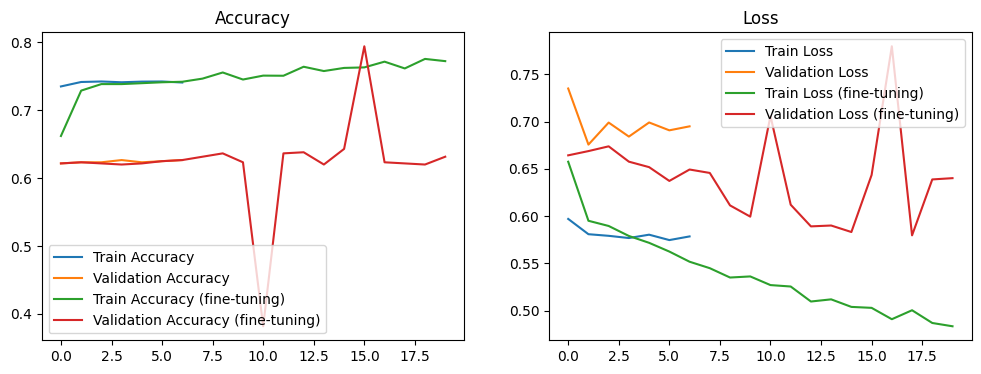

In [17]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Paths
train_normal_path = 'chest_xray/train/NORMAL'
train_pneumonia_path = 'chest_xray/train/PNEUMONIA'
test_normal_path = 'chest_xray/test/NORMAL'
test_pneumonia_path = 'chest_xray/test/PNEUMONIA'

# Function to load images from a directory
def load_images_from_folder(folder, count=5):
    images = []
    for filename in os.listdir(folder)[:count]:
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Load some sample images
train_normal_images = load_images_from_folder(train_normal_path)
train_pneumonia_images = load_images_from_folder(train_pneumonia_path)
test_normal_images = load_images_from_folder(test_normal_path)
test_pneumonia_images = load_images_from_folder(test_pneumonia_path)

# Function to display images
def display_images(images, title):
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display sample images
display_images(train_normal_images, "Train - Normal")
display_images(train_pneumonia_images, "Train - Pneumonia")
display_images(test_normal_images, "Test - Normal")
display_images(test_pneumonia_images, "Test - Pneumonia")

# Data distribution
train_normal_count = len(os.listdir(train_normal_path))
train_pneumonia_count = len(os.listdir(train_pneumonia_path))
test_normal_count = len(os.listdir(test_normal_path))
test_pneumonia_count = len(os.listdir(test_pneumonia_path))

print(f"Train Normal Images: {train_normal_count}")
print(f"Train Pneumonia Images: {train_pneumonia_count}")
print(f"Test Normal Images: {test_normal_count}")
print(f"Test Pneumonia Images: {test_pneumonia_count}")

# Set the image size and batch size
IMG_SIZE = (224, 224)  # Resize images to 224x224
BATCH_SIZE = 32

# Define the data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Increased rotation range
    width_shift_range=0.4,  # Increased width shift range
    height_shift_range=0.4,  # Increased height shift range
    shear_range=0.4,  # Increased shear range
    zoom_range=0.4,  # Increased zoom range
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels with the nearest pixel
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test/validation

# Load the train and test datasets
train_generator = train_datagen.flow_from_directory(
    'chest_xray/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Use 'binary' for 2 classes or 'categorical' for >2 classes
)

test_generator = test_datagen.flow_from_directory(
    'chest_xray/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Visualize some augmented images
def visualize_augmented_images(generator):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()

visualize_augmented_images(train_generator)

# Load the EfficientNetB0 model, pre-trained on ImageNet, without the top (fully connected) layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new top layers for our specific classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the convolutional base layers (fine-tuning only the top layers)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=20,  # Increased epochs
    callbacks=[reduce_lr, early_stopping]
)

# Unfreeze some layers in the convolutional base and continue training (fine-tuning)
for layer in base_model.layers[:150]:  # Unfreeze more layers
    layer.trainable = False
for layer in base_model.layers[150:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=20,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Train Accuracy (fine-tuning)')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy (fine-tuning)')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Train Loss (fine-tuning)')
plt.plot(history_fine.history['val_loss'], label='Validation Loss (fine-tuning)')
plt.legend()
plt.title('Loss')

plt.show()


Epoch 1/10
163/163 [==============================] - 84s 491ms/step - loss: 0.6012 - accuracy: 0.7329 - val_loss: 0.6911 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 80s 491ms/step - loss: 0.5812 - accuracy: 0.7419 - val_loss: 0.6867 - val_accuracy: 0.6299 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - 80s 487ms/step - loss: 0.5833 - accuracy: 0.7421 - val_loss: 0.6932 - val_accuracy: 0.6266 - lr: 0.0010
Epoch 4/10
163/163 [==============================] - 79s 486ms/step - loss: 0.5776 - accuracy: 0.7423 - val_loss: 0.6963 - val_accuracy: 0.6266 - lr: 0.0010
Epoch 5/10
163/163 [==============================] - ETA: 0s - loss: 0.5787 - accuracy: 0.7419
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
163/163 [==============================] - 78s 480ms/step - loss: 0.5787 - accuracy: 0.7419 - val_loss: 0.7327 - val_accuracy: 0.6217 - lr: 0.0010
Epoch 6/10
163/163 [============================

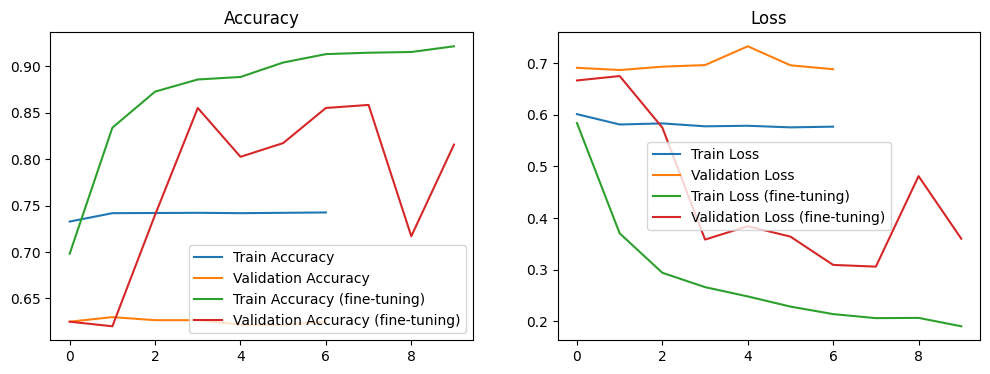

In [19]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping





# Load the EfficientNetB0 model, pre-trained on ImageNet, without the top (fully connected) layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new top layers for our specific classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the convolutional base layers (fine-tuning only the top layers)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=10,  # Increased epochs
    callbacks=[reduce_lr, early_stopping]
)

# Unfreeze some layers in the convolutional base and continue training (fine-tuning)
for layer in base_model.layers[:15]:  # Unfreeze more layers
    layer.trainable = False
for layer in base_model.layers[15:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])


# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=10,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Train Accuracy (fine-tuning)')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy (fine-tuning)')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Train Loss (fine-tuning)')
plt.plot(history_fine.history['val_loss'], label='Validation Loss (fine-tuning)')
plt.legend()
plt.title('Loss')

plt.show()


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/20
164/164 [==============================] - 88s 498ms/step - loss: 0.4224 - accuracy: 0.8024 - val_loss: 0.3841 - val_accuracy: 0.8446 - lr: 0.0010
Epoch 2/20
164/164 [==============================] - 80s 489ms/step - loss: 0.2770 - accuracy: 0.8744 - val_loss: 0.3517 - val_accuracy: 0.8478 - lr: 0.0010
Epoch 3/20
164/164 [==============================] - 79s 483ms/step - loss: 0.2359 - accuracy: 0.9044 - val_loss: 0.2735 - val_accuracy: 0.8958 - lr: 0.0010
Epoch 4/20
164/164 [==============================] - 79s 484ms/step - loss: 0.2238 - accuracy: 0.9073 - val_loss: 0.2490 - val_accuracy: 0.9087 - lr: 0.0010
Epoch 5/20
164/164 [==============================] - 79s 483ms/step - loss: 0.2034 - accuracy: 0.9186 - val_loss: 0.2413 - val_accuracy: 0.9006 - lr: 0.0010
Epoch 6/20
164/164 [==============================] - 80s 486ms/step - loss: 0.1915 - accuracy: 0.9216 - val_loss: 0.2273 - val

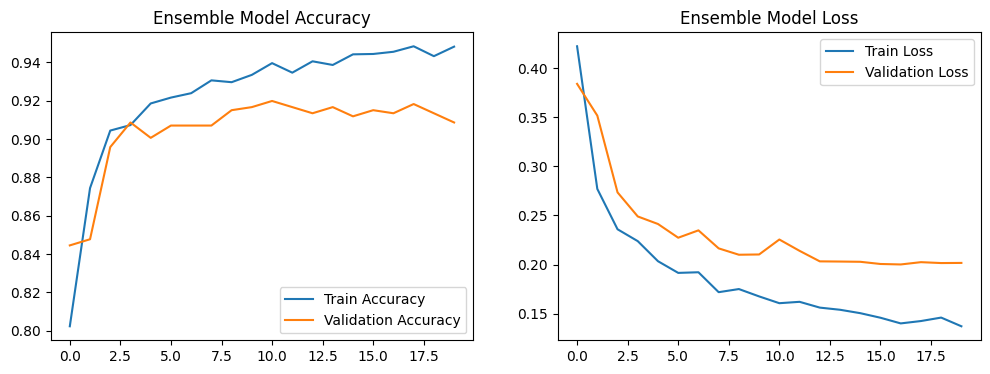

In [22]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Average, Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Paths
train_data_dir = 'chest_xray/train'
test_data_dir = 'chest_xray/test'

# Set the image size and batch size
IMG_SIZE = (224, 224)  # Resize images to 224x224
BATCH_SIZE = 32

# Define the data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear angle in counter-clockwise direction
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels with the nearest pixel
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test/validation

# Create the data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Define a custom data generator that provides the same batch for each model
class MultiInputDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, generator):
        self.generator = generator
        
    def __len__(self):
        return len(self.generator)
    
    def __getitem__(self, index):
        x, y = self.generator[index]
        return [x, x, x], y
    
    def on_epoch_end(self):
        self.generator.on_epoch_end()

train_multi_generator = MultiInputDataGenerator(train_generator)
test_multi_generator = MultiInputDataGenerator(test_generator)

# Load pre-trained models
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base layers
for model_base in [vgg16_base, resnet50_base, efficientnet_base]:
    for layer in model_base.layers:
        layer.trainable = False

# Define new top layers for each model
def add_new_top_layers(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    return x

vgg16_top = add_new_top_layers(vgg16_base)
resnet50_top = add_new_top_layers(resnet50_base)
efficientnet_top = add_new_top_layers(efficientnet_base)

# Merge the outputs of all models
merged = Average()([vgg16_top, resnet50_top, efficientnet_top])
output = Dense(1, activation='sigmoid')(merged)

# Create the ensemble model
ensemble_model = Model(inputs=[vgg16_base.input, resnet50_base.input, efficientnet_base.input], outputs=output)

# Compile the ensemble model
ensemble_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the ensemble model
ensemble_history = ensemble_model.fit(
    train_multi_generator,
    steps_per_epoch=len(train_multi_generator),
    validation_data=test_multi_generator,
    validation_steps=len(test_multi_generator),
    epochs=20,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the ensemble model on the test set
ensemble_test_loss, ensemble_test_acc = ensemble_model.evaluate(test_multi_generator, steps=len(test_multi_generator))
print(f"Ensemble Test Accuracy: {ensemble_test_acc * 100:.2f}%")

# Plot training and validation accuracy and loss for the ensemble model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ensemble_history.history['accuracy'], label='Train Accuracy')
plt.plot(ensemble_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Ensemble Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ensemble_history.history['loss'], label='Train Loss')
plt.plot(ensemble_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Ensemble Model Loss')

plt.show()


In [32]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Average, Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Paths
train_data_dir = 'chest_xray/train'
test_data_dir = 'chest_xray/test'

# Set the image size and batch size
IMG_SIZE = (224, 224)  # Resize images to 224x224
BATCH_SIZE = 32

# Define the data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear angle in counter-clockwise direction
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels with the nearest pixel
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test/validation

# Create the data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Define a custom data generator that provides the same batch for each model
class MultiInputDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, generator):
        self.generator = generator
        
    def __len__(self):
        return len(self.generator)
    
    def __getitem__(self, index):
        x, y = self.generator[index]
        return [x, x, x], y
    
    def on_epoch_end(self):
        self.generator.on_epoch_end()

train_multi_generator = MultiInputDataGenerator(train_generator)
test_multi_generator = MultiInputDataGenerator(test_generator)

# Load pre-trained models
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base layers
for model_base in [vgg16_base, resnet50_base, efficientnet_base]:
    for layer in model_base.layers:
        layer.trainable = False

# Define new top layers for each model
def add_new_top_layers(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    return x

vgg16_top = add_new_top_layers(vgg16_base)
resnet50_top = add_new_top_layers(resnet50_base)
efficientnet_top = add_new_top_layers(efficientnet_base)

# Merge the outputs of all models
merged = Average()([vgg16_top, resnet50_top, efficientnet_top])
output = Dense(1, activation='sigmoid')(merged)

# Create the ensemble model
ensemble_model = Model(inputs=[vgg16_base.input, resnet50_base.input, efficientnet_base.input], outputs=output)

# Compile the ensemble model
ensemble_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the ensemble model
ensemble_history = ensemble_model.fit(
    train_multi_generator,
    steps_per_epoch=len(train_multi_generator),
    validation_data=test_multi_generator,
    validation_steps=len(test_multi_generator),
    epochs=20,
    callbacks=[reduce_lr, early_stopping]
)






# Evaluate the ensemble model on the test set
ensemble_test_loss, ensemble_test_acc = ensemble_model.evaluate(test_multi_generator, steps=len(test_multi_generator))
print(f"Ensemble Test Accuracy: {ensemble_test_acc * 100:.2f}%")




Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/20
164/164 [==============================] - 89s 503ms/step - loss: 0.4021 - accuracy: 0.8073 - val_loss: 0.3799 - val_accuracy: 0.8478 - lr: 0.0010
Epoch 2/20
164/164 [==============================] - 79s 483ms/step - loss: 0.2736 - accuracy: 0.8807 - val_loss: 0.3188 - val_accuracy: 0.8702 - lr: 0.0010
Epoch 3/20
164/164 [==============================] - 79s 480ms/step - loss: 0.2317 - accuracy: 0.9052 - val_loss: 0.2811 - val_accuracy: 0.8910 - lr: 0.0010
Epoch 4/20
164/164 [==============================] - 79s 481ms/step - loss: 0.2191 - accuracy: 0.9115 - val_loss: 0.2392 - val_accuracy: 0.9103 - lr: 0.0010
Epoch 5/20
164/164 [==============================] - 78s 477ms/step - loss: 0.1965 - accuracy: 0.9222 - val_loss: 0.2342 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 6/20
164/164 [==============================] - 80s 484ms/step - loss: 0.1937 - accuracy: 0.9205 - val_loss: 0.2183 - val

Ensemble Test Accuracy: 94.83%


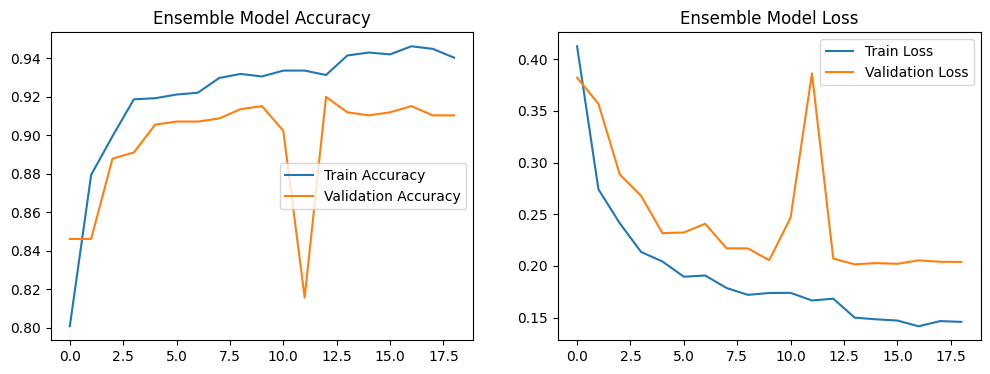

In [31]:
print(f"Ensemble Test Accuracy: {ensemble_test_acc * 100:.2f}%")

# Plot training and validation accuracy and loss for the ensemble model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ensemble_history.history['accuracy'], label='Train Accuracy')
plt.plot(ensemble_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Ensemble Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ensemble_history.history['loss'], label='Train Loss')
plt.plot(ensemble_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Ensemble Model Loss')

plt.show()